# **TMBD MOVIE DATA ANALYSIS**

This project extracts movie data from the TMDB API, cleans and preprocesses the dataset, and performs in-depth exploratory data analysis. The goal is to uncover meaningful insights, identify trends, and support data-driven decision-making based on movie performance, audience behavior, and industry patterns.

## **Data Extraction**
Extracts movie data from the TMDB API

In [ ]:
#Imports packages and modules

#Import os and sys
import os
import sys 
from pathlib import Path
import ast
import pandas as pd
import numpy as np

#Extarcts the root path of the project and appends it to the sys path
project_root = Path().resolve().parent
sys.path.append(str(project_root))

#Imports loadEnv from config module
from Config.config import loadEnv, getURL, create_retry

#Imports extractDataFromAPI from the extract data module
from Data_Extraction.extractData import extractDataFromAPI

#Imports separate Array from the Data Cleaning module
from Data_Cleaning.separateArray import separateArray

#Imports removeColumns from the remove column module
from Data_Cleaning.removeColumn import removeColumn

#Imports the convertDataType from the convert data type module
from Data_Cleaning.convertDataType import convertDataType

from Data_Cleaning.convertNumeric import convertNumeric

from Data_Cleaning.reOrderColumns import reOrderColumns

from Data_Cleaning.getColumnSize import getColumnSize

from Data_Cleaning.extractColumn import extractColumnData

#Imports KPI Analysis from the KPI_Analysis module
from Data_Analysis.KPI_Analysis.kpiAnalysis import rankColumn, calculateProfit, calculateROI, dataExist, calculateCentralTendency

#Imports functions for viasualizing the data from the data visualization module
from Data_Analysis.Data_Visualization.dataVisualization import trendVisuals, plot_yearly_box_office_trends, plot_franchise_vs_standalone

In [2]:
movie_ids = [0, 299534,19995,140607,299536,597,135397, 420818, 24428, 168259, 99861,
                    284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513] 

API_KEY = loadEnv(fileName="API_KEY")

url = getURL()

session = create_retry()

extractDataFromAPI(session = session, url = url, API_KEY = API_KEY, movie_ids=movie_ids)


Movie data saved to: ../data/movieData.csv


In [3]:
#Reads the csv file
data = pd.read_csv("../data/movieData.csv")

#Creates a copy of the original data so that the original data is not been modified
movie_data = data.copy()

In [4]:
#Outputs the columns if the dataFrame is not None or empty
movie_data.columns if movie_data is not None and not movie_data.empty else "No data extracted from the API"

Index(['adult', 'backdrop_path', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'origin_country', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'credits.cast', 'credits.crew',
       'belongs_to_collection'],
      dtype='object')

In [5]:
#Outputs the first five rows in the extracted data
movie_data.head()

,adult,backdrop_path,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,...,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew,belongs_to_collection
0,False,/9wXPKruA6bWYk2co5ix6fH59Qr8.jpg,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,Avengers: Endgame,...,False,8.237,27001,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ...",NaN
1,False,/7JNzw1tSZZEgsBw6lu0VfO2X2Ef.jpg,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,Avatar,...,False,7.594,32912,87096.0,Avatar Collection,/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg,/6qkJLRCZp9Y3ovXti5tSuhH0DpO.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 58871, 'k...",NaN
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,Star Wars: The Force Awakens,...,False,7.255,20120,10.0,Star Wars Collection,/22dj38IckjzEEUZwN1tPU5VJ1qq.jpg,/qVPChlozQ1BP3svfHjiAdNneMGA.jpg,"[{'adult': False, 'gender': 2, 'id': 3, 'known...","[{'adult': False, 'gender': 2, 'id': 491, 'kno...",NaN
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,Avengers: Infinity War,...,False,8.235,31209,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ...",NaN
4,False,/xnHVX37XZEp33hhCbYlQFq7ux1J.jpg,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,Titanic,...,False,7.903,26533,NaN,NaN,NaN,NaN,"[{'adult': False, 'gender': 2, 'id': 6193, 'kn...","[{'adult': False, 'gender': 2, 'id': 8525, 'kn...",NaN


In [6]:
#Outputs information of the extracted data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                18 non-null     bool   
 1   backdrop_path                        18 non-null     object 
 2   budget                               18 non-null     int64  
 3   genres                               18 non-null     object 
 4   homepage                             18 non-null     object 
 5   id                                   18 non-null     int64  
 6   imdb_id                              18 non-null     object 
 7   origin_country                       18 non-null     object 
 8   original_language                    18 non-null     object 
 9   original_title                       18 non-null     object 
 10  overview                             18 non-null     object 
 11  popularity                        

## **DATA CLEANING**

This section of rthe code runs through the data to keep for analysis, converting data types to save space when the program is in execution.


### **DROPPING COLUMNS**

The below columns will be dropped based on the reasons attached:

adult — The adult column is not needed for KPI analysis.

backdrop_path — Rarely needed; large strings/URLs; drop to save space (poster_path is enough).

homepage — optional metadata; drop (keeps size down).

imdb_id — external id not used in spec; drop unless you plan cross-referencing.

origin_country — ambiguous / redundant with production_countries.

original_title — redundant with title for your analysis (drop unless you need original-language title).

video — not useful for KPIs.

belongs_to_collection.id, belongs_to_collection.poster_path, belongs_to_collection.backdrop_path — drop (keep only collection name).

belongs_to_collection (raw JSON) — if you extract the .name into a single column, drop the raw JSON.

any duplicate columns (e.g., both belongs_to_collection and belongs_to_collection.name keep only the .name value).

In [7]:
#Columns to drop
#columns: ['adult', 'imdb_id', 'original_title', 'video', 'homepage'].
columns_to_remove = ('adult', 'imdb_id', 'original_title', 'video', 'homepage', 'backdrop_path', 'origin_country', 'belongs_to_collection' )

#Calls the remove column function to remove the stated columns from the dataFrame
movie_data = removeColumn(movie_data, columns=columns_to_remove)

In [8]:
#Outputs the remaining columns after the dropping the irrelevant columns for this analysis
movie_data.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count',
       'belongs_to_collection.id', 'belongs_to_collection.name',
       'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'credits.cast', 'credits.crew'],
      dtype='object')

### **EXTRACTING KEY DATA POINTS**

This section extracts important data points from the Genre, Spoken languages, Production companies and Production countries.

Genre names (genres → separate multiple genres with "|").

Spoken languages (spoken_languages → separate with "|").

Production countries (production_countries → separate with "|").

Production companies (production_companies → separate with "|").

In [9]:
movie_data = separateArray(data=movie_data, 
                           columns={"genres":"name", "production_countries": "name",
                                    "spoken_languages": "name", "production_companies": "name"}
                            )

In [10]:
#Value count of the modified columns
modified_columns = ["genres", "production_countries", "spoken_languages", "production_companies"]

for modified_column in modified_columns:
    print(f"\n ---- {modified_column.upper()} -------")
    #Counts movies with the same column data and outputs it
    print(movie_data[modified_column].value_counts(dropna=False).head(20))


 ---- GENRES -------
genres
Adventure | Action | Science Fiction                 3
Action | Adventure | Science Fiction | Thriller      2
Action | Adventure | Science Fiction                 2
Action | Adventure | Fantasy | Science Fiction       1
Drama | Romance                                      1
Adventure | Science Fiction | Action                 1
Adventure | Drama | Family | Animation               1
Science Fiction | Action | Adventure                 1
Action | Crime | Thriller                            1
Adventure | Fantasy                                  1
Family | Animation | Adventure | Comedy | Fantasy    1
Animation | Family | Adventure | Fantasy             1
Family | Fantasy | Romance                           1
Action | Adventure | Animation | Family              1
Name: count, dtype: int64

 ---- PRODUCTION_COUNTRIES -------
production_countries
United States of America                     16
United States of America | United Kingdom     1
United Kingdom | Unite

### **HANDLING INCORRECT AND MISSING DATA**

#### **CONVERT COLUMN DATA TYPES**

Converts budget, id and popularity to integers to save space

Converts release_date to datetime

In [11]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   budget                               18 non-null     int64  
 1   genres                               18 non-null     object 
 2   id                                   18 non-null     int64  
 3   original_language                    18 non-null     object 
 4   overview                             18 non-null     object 
 5   popularity                           18 non-null     float64
 6   poster_path                          18 non-null     object 
 7   production_companies                 18 non-null     object 
 8   production_countries                 18 non-null     object 
 9   release_date                         18 non-null     object 
 10  revenue                              18 non-null     int64  
 11  runtime                           

In [12]:
movie_data.head()

,budget,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,...,tagline,title,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew
0,356000000,Adventure | Science Fiction | Action,299534,en,After the devastating events of Avengers: Infi...,16.2237,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Marvel Studios,United States of America,2019-04-24,...,Avenge the fallen.,Avengers: Endgame,8.237,27001,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
1,237000000,Action | Adventure | Fantasy | Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",51.0975,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Dune Entertainment | Lightstorm Entertainment ...,United States of America | United Kingdom,2009-12-15,...,Enter the world of Pandora.,Avatar,7.594,32912,87096.0,Avatar Collection,/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg,/6qkJLRCZp9Y3ovXti5tSuhH0DpO.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 58871, 'k..."
2,245000000,Adventure | Action | Science Fiction,140607,en,Thirty years after defeating the Galactic Empi...,8.5977,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Lucasfilm Ltd. | Bad Robot,United States of America,2015-12-15,...,Every generation has a story.,Star Wars: The Force Awakens,7.255,20120,10.0,Star Wars Collection,/22dj38IckjzEEUZwN1tPU5VJ1qq.jpg,/qVPChlozQ1BP3svfHjiAdNneMGA.jpg,"[{'adult': False, 'gender': 2, 'id': 3, 'known...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
3,300000000,Adventure | Action | Science Fiction,299536,en,As the Avengers and their allies have continue...,22.6948,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Marvel Studios,United States of America,2018-04-25,...,Destiny arrives all the same.,Avengers: Infinity War,8.235,31209,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
4,200000000,Drama | Romance,597,en,101-year-old Rose DeWitt Bukater tells the sto...,27.5792,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Paramount Pictures | 20th Century Fox | Lights...,United States of America,1997-11-18,...,Nothing on earth could come between them.,Titanic,7.903,26533,NaN,NaN,NaN,NaN,"[{'adult': False, 'gender': 2, 'id': 6193, 'kn...","[{'adult': False, 'gender': 2, 'id': 8525, 'kn..."


In [13]:
#Checks the unique values in the status column
movie_data["status"].unique()

array(['Released'], dtype=object)

In [14]:
movie_data = convertDataType(
                                data=movie_data, 
                                columns={"budget": "int64", "id": "int64", "popularity": "int64",
                                         "release_date": "datetime", "title": "string", "poster_path": "string",
                                         "tagline": "string", "status": "category", "overview": "string"
                                         }
                            )

In [15]:
#Gets Info of the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   budget                               18 non-null     int64         
 1   genres                               18 non-null     object        
 2   id                                   18 non-null     int64         
 3   original_language                    18 non-null     object        
 4   overview                             18 non-null     string        
 5   popularity                           18 non-null     float64       
 6   poster_path                          18 non-null     string        
 7   production_companies                 18 non-null     object        
 8   production_countries                 18 non-null     object        
 9   release_date                         18 non-null     datetime64[ns]
 10  revenue         

### **REPLACE ALL UNREALISTIC VALUES**

Replaces all unrealistic values:

Budget/Revenue/Runtime = 0 → Replace with NaN or infer from similar movies.

Convert 'budget' and 'revenue' to million USD.

Movies with vote_count = 0 → Analyze their vote_average and adjust accordingly.

'overview' and 'tagline' → Replace known placeholders (e.g., 'No Data') with NaN.

#### **REPLACES BUDGET, REVENUE AND RUNTIME**

Replaces all occurence in of zeros or NaNs with NaNs in any of the columns

In [16]:
#Checks the budget, Revenue and Runtime columns and counts all the data with  0
#print(f"Number: {(movie_data["revenue"] == "NaN").sum()}")
unrealistic_columns = ["budget", "revenue", "runtime"]

#Loops through all the columns in the unrealistic columns and outputs the number of 0 and NaNs in the column
for column in unrealistic_columns:
    print(f"{column.upper()} has {(movie_data[column] == 0).sum()} zeros \n")
    print(f"{column.upper()} has {(movie_data[column].isna()).sum()} NaNs \n")
    print("------------\n")



BUDGET has 0 zeros 

BUDGET has 0 NaNs 

------------

REVENUE has 0 zeros 

REVENUE has 0 NaNs 

------------

RUNTIME has 0 zeros 

RUNTIME has 0 NaNs 

------------



Since all the columns have no zeros or NaNs, there is not need to add a transformation again

#### **CONVERT BUDGET AND REVENUE TO MILLION USD**

Converts the budget and revenue columns to million USD

In [17]:
#Calls the convert numeric to scale the budget and revenue columns to a million USD
movie_data = convertNumeric(movie_data, columns=["budget", "revenue"], value=1000000)

In [18]:
movie_data.head()

,budget_musd,genres,id,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,...,tagline,title,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew
0,356,Adventure | Science Fiction | Action,299534,en,After the devastating events of Avengers: Infi...,16.2237,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Marvel Studios,United States of America,2019-04-24,...,Avenge the fallen.,Avengers: Endgame,8.237,27001,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
1,237,Action | Adventure | Fantasy | Science Fiction,19995,en,"In the 22nd century, a paraplegic Marine is di...",51.0975,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Dune Entertainment | Lightstorm Entertainment ...,United States of America | United Kingdom,2009-12-15,...,Enter the world of Pandora.,Avatar,7.594,32912,87096.0,Avatar Collection,/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg,/6qkJLRCZp9Y3ovXti5tSuhH0DpO.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 58871, 'k..."
2,245,Adventure | Action | Science Fiction,140607,en,Thirty years after defeating the Galactic Empi...,8.5977,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Lucasfilm Ltd. | Bad Robot,United States of America,2015-12-15,...,Every generation has a story.,Star Wars: The Force Awakens,7.255,20120,10.0,Star Wars Collection,/22dj38IckjzEEUZwN1tPU5VJ1qq.jpg,/qVPChlozQ1BP3svfHjiAdNneMGA.jpg,"[{'adult': False, 'gender': 2, 'id': 3, 'known...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
3,300,Adventure | Action | Science Fiction,299536,en,As the Avengers and their allies have continue...,22.6948,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Marvel Studios,United States of America,2018-04-25,...,Destiny arrives all the same.,Avengers: Infinity War,8.235,31209,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
4,200,Drama | Romance,597,en,101-year-old Rose DeWitt Bukater tells the sto...,27.5792,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Paramount Pictures | 20th Century Fox | Lights...,United States of America,1997-11-18,...,Nothing on earth could come between them.,Titanic,7.903,26533,NaN,NaN,NaN,NaN,"[{'adult': False, 'gender': 2, 'id': 6193, 'kn...","[{'adult': False, 'gender': 2, 'id': 8525, 'kn..."


In [19]:
movie_data.columns

Index(['budget_musd', 'genres', 'id', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue_musd', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'belongs_to_collection.id', 'belongs_to_collection.name',
       'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'credits.cast', 'credits.crew'],
      dtype='object')

#### **CHECKING VOTE COUNT**

In [20]:
#Counts the number of movies with 0 vote count before performing analysis
print(f'Number of movies with zero count {(movie_data["vote_count"] == 0).sum()}')

Number of movies with zero count 0


The output shows there is no movie with zero vote count

#### **REPLACING NULL VALUES IN OVERVIEW AND TAGLINE**

Replaces placeholders with No Data with NaN

In [21]:
#Outputs the unique values in the overview and Tagline columns to access any anomaly(ies)
pd.Series(movie_data["overview"].unique())

0     After the devastating events of Avengers: Infi...
1     In the 22nd century, a paraplegic Marine is di...
2     Thirty years after defeating the Galactic Empi...
3     As the Avengers and their allies have continue...
4     101-year-old Rose DeWitt Bukater tells the sto...
5     Twenty-two years after the events of Jurassic ...
6     Simba idolizes his father, King Mufasa, and ta...
7     When an unexpected enemy emerges and threatens...
8     Deckard Shaw seeks revenge against Dominic Tor...
9     When Tony Stark tries to jumpstart a dormant p...
10    King T'Challa returns home to the reclusive, t...
11    Harry, Ron and Hermione continue their quest t...
12    Rey develops her newly discovered abilities wi...
13    Elsa, Anna, Kristoff and Olaf head far into th...
14    Three years after Jurassic World was destroyed...
15    Young princess Anna of Arendelle dreams about ...
16    A live-action adaptation of Disney's version o...
17    Elastigirl springs into action to save the

In [22]:
#Outputs the unique values in the overview and Tagline columns to access any anomaly(ies)
pd.Series(movie_data["tagline"].unique())

0                                    Avenge the fallen.
1                           Enter the world of Pandora.
2                         Every generation has a story.
3                         Destiny arrives all the same.
4             Nothing on earth could come between them.
5                                     The park is open.
6                                The king has returned.
7                               Some assembly required.
8                                  Vengeance hits home.
9                                   A new age has come.
10                                  Long live the king.
11                                         It all ends.
12                                    Let the past die.
13                       The past is not what it seems.
14                                    The park is gone.
15    Only the act of true love will thaw a frozen h...
16                                        Be our guest.
17                        It's been too long, da

The output from the code above shows that there are no placeholders in either the overview or tagline column which is empty or has No Data

#### **REMOVE DUPLICATES AND DROP ROWS**

This section removes duplicates from the movie dataset and drops all movies without ids or titles

In [23]:
#Checks if there are duplicates in the dataset
print(f"There are {movie_data.duplicated().sum()} duplicates in the movie dataset")

There are 0 duplicates in the movie dataset


In [24]:
#Checks if any of the movies has no id or title
print(f"{(movie_data["id"].isna()).sum()} rows have null values in the id Column\n")

print(f"{(movie_data["title"].isna()).sum()} rows have null values in the title Column")

0 rows have null values in the id Column

0 rows have null values in the title Column


There are no rows with null values in the id and title columns

In [25]:
count_non_nan_rows = (movie_data.notna().sum(axis=1) >= 10).sum()
print(f"There are {count_non_nan_rows} rows with non-NaN values ≥ 10")


There are 18 rows with non-NaN values ≥ 10


This clearly shows that non of the rows have NaN values in more than 10 columns

In [26]:
#Checks the number of unique values in the Released column before dropping any
#Note the Released column has been converted to a category 

print(f"There are {movie_data['status'].nunique()} unique values: {movie_data['status'].unique()}")


There are 1 unique values: ['Released']
Categories (1, object): ['Released']


There is only one unique value in the status columnn which are all Released so there is no need to drop any of the rows

In [27]:
#Dropping the status column
movie_data.drop(columns=["status"], inplace=True)

In [28]:
#Checks if the status column is still in the columns
print("status" in movie_data.columns)

False


#### **EXTRACT CAST COLUMN SIZE**

In [29]:
movie_data = getColumnSize(data=movie_data, column="credits.cast", columnName="cast_size")

#### **EXTRACTS THE CREWS SIZE**

In [30]:
movie_data = getColumnSize(data=movie_data, column="credits.crew", columnName="crew_size")

#### **EXTRACTS DIRECTORS IN EACH MOVIE**

In [31]:
movie_data = extractColumnData(data=movie_data, 
                               column="credits.crew", 
                               columnName="directors", 
                               columnKey="job", 
                               columnValue="Director"
                               )

In [32]:
movie_data["directors"]

0     Joe Russo, Anthony Russo
1                James Cameron
2                  J.J. Abrams
3     Joe Russo, Anthony Russo
4                James Cameron
5              Colin Trevorrow
6                  Jon Favreau
7                  Joss Whedon
8                    James Wan
9                  Joss Whedon
10                Ryan Coogler
11                 David Yates
12                Rian Johnson
13    Jennifer Lee, Chris Buck
14                 J.A. Bayona
15    Chris Buck, Jennifer Lee
16                 Bill Condon
17                   Brad Bird
Name: directors, dtype: object

#### **REORDER AND FINALIZE DATAFRAME**

This reorders and finalizes the dataframe and resets the index of the dataFrame as an add on

Columns to reorder:

['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']

In [33]:
movie_data.columns

Index(['budget_musd', 'genres', 'id', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue_musd', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'belongs_to_collection.id', 'belongs_to_collection.name',
       'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'credits.cast', 'credits.crew',
       'cast_size', 'crew_size', 'directors'],
      dtype='object')

In [34]:
#Order of the columns
column_order = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 
                'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 
                'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 
                'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'directors', 
                'crew_size']

#Calls the reOrder function to order the columns based on the given columns
movie_data = reOrderColumns(data=movie_data, columns=column_order)

In [35]:
#Puts the columns in a pandas Series to clearly view if the columns match the new order of the columns
pd.Series(movie_data.columns)

0                                      id
1                                   title
2                                 tagline
3                            release_date
4                                  genres
5                       original_language
6                             budget_musd
7                            revenue_musd
8                    production_companies
9                    production_countries
10                             vote_count
11                           vote_average
12                             popularity
13                                runtime
14                               overview
15                       spoken_languages
16                            poster_path
17                              cast_size
18                              directors
19                              crew_size
20               belongs_to_collection.id
21             belongs_to_collection.name
22      belongs_to_collection.poster_path
23    belongs_to_collection.backdr

## **KPI IMPLEMENTATION AND ANALYSIS**

Implements various KPIs to gain deep insights from the data which will inspire future critical decisions

#### **HIGHEST REVENUE**

Ranks movies based on the highest revenue



In [36]:
#Calls the rankColumn function to rank the movies based on their revenues
movies_ranked_by_revenue = rankColumn(data=movie_data, column="revenue_musd", order="desc")

#Extract key columns for deeper understanding since the all the columns are not showing properly
# id, title, release_date, genres, budget_musd, revenue_musd, vote_count, popularity
columns_to_display = ["id", "title", "release_date", "genres", "budget_musd", "revenue_musd", "vote_count",
                      "popularity"
                      ]
movies_ranked_by_revenue[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity
0,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975
1,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237
2,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792
3,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977
4,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948
5,135397,Jurassic World,2015-06-06,Action | Adventure | Science Fiction | Thriller,150,1672,21141,10.1396
6,420818,The Lion King,2019-07-12,Adventure | Drama | Family | Animation,260,1662,10576,9.8815
7,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963
8,168259,Furious 7,2015-04-01,Action | Crime | Thriller,190,1515,11045,10.4464
9,330457,Frozen II,2019-11-20,Family | Animation | Adventure | Comedy | Fantasy,150,1454,10083,10.5366


The above data shows that the movie Avatar had the highest revenue and Incredibles 2 had the lowest revenue.

**KEY TAKEAWAY:** The company is generating a lot of revenue from the Avatar movie as compared all the other movies.

On the other hand, Incredibles is the worst generaing revenue movie for the company

#### **HIGHEST BUDGET**

In [37]:
#Calls the rankColumn function to rank the movies based on their revenues
movies_ranked_by_budget = rankColumn(data=movie_data, column="budget_musd", order="desc")

movies_ranked_by_budget[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity
0,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237
1,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948
2,181808,Star Wars: The Last Jedi,2017-12-13,Adventure | Action | Science Fiction,300,1333,15945,8.7394
3,420818,The Lion King,2019-07-12,Adventure | Drama | Family | Animation,260,1662,10576,9.8815
4,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977
5,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975
6,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069
7,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963
8,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792
9,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563


**KEY INSIGHT:** Avengers: Endgame had the highest budget as compared to all the movies whiles Harry Potter and the Deathly Hallows: Part 2 had the lowest budget

#### **CALCULATES PROFIT**

Calculates the profit for each movie and creates a new column to store the profit


In [38]:
movie_data_with_profit = calculateProfit(data=movie_data, revenueColumn="revenue_musd", 
                                         budgetColumn="budget_musd"
                                         )

columns_to_display.append("profit")

movie_data_with_profit[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,profit
0,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,2443
1,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,1752
2,181808,Star Wars: The Last Jedi,2017-12-13,Adventure | Action | Science Fiction,300,1333,15945,8.7394,1033
3,420818,The Lion King,2019-07-12,Adventure | Drama | Family | Animation,260,1662,10576,9.8815,1402
4,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977,1823
5,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,2687
6,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069,1170
7,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,1299
8,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,2064
9,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563,1150


#### **HIGHEST MOVIE**

In [39]:
movie_with_highest_profit = rankColumn(data=movie_data_with_profit, column="profit", order="desc")

movie_with_highest_profit[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,profit
0,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,2687
1,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,2443
2,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,2064
3,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977,1823
4,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,1752
5,135397,Jurassic World,2015-06-06,Action | Adventure | Science Fiction | Thriller,150,1672,21141,10.1396,1522
6,420818,The Lion King,2019-07-12,Adventure | Drama | Family | Animation,260,1662,10576,9.8815,1402
7,168259,Furious 7,2015-04-01,Action | Crime | Thriller,190,1515,11045,10.4464,1325
8,330457,Frozen II,2019-11-20,Family | Animation | Adventure | Comedy | Fantasy,150,1454,10083,10.5366,1304
9,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,1299


#### **LOWEST PROFIT**

In [40]:
movie_with_lowest_profit = rankColumn(data=movie_data_with_profit, column="profit", order="asc")

movie_with_lowest_profit[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,profit
0,181808,Star Wars: The Last Jedi,2017-12-13,Adventure | Action | Science Fiction,300,1333,15945,8.7394,1033
1,260513,Incredibles 2,2018-06-14,Action | Adventure | Animation | Family,200,1243,13378,9.4264,1043
2,321612,Beauty and the Beast,2017-03-16,Family | Fantasy | Romance,160,1266,15843,12.3792,1106
3,109445,Frozen,2013-11-20,Animation | Family | Adventure | Fantasy,150,1274,17199,21.1038,1124
4,351286,Jurassic World: Fallen Kingdom,2018-06-06,Action | Adventure | Science Fiction | Thriller,170,1310,12421,8.8394,1140
5,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563,1150
6,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069,1170
7,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-12,Adventure | Fantasy,125,1342,21485,25.6952,1217
8,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,1299
9,330457,Frozen II,2019-11-20,Family | Animation | Adventure | Comedy | Fantasy,150,1454,10083,10.5366,1304


**USEFUL INSIGHT:** Avatar generated the highest profit whiles Star Wars: The Last Jedi generated the lowest profit 

#### **CALCULATES ROI**

Calculates Return on Investment (ROI)

In [41]:
movie_data_with_ROI = calculateROI(data=movie_data, revenueColumn="revenue_musd",
                                   budgetColumn="budget_musd"
                                )

In [42]:
#Removes profit from the list of columns to dispaly and adds ROI to the list of columns to display
columns_to_display.pop()
columns_to_display.append("ROI")

print(columns_to_display)

['id', 'title', 'release_date', 'genres', 'budget_musd', 'revenue_musd', 'vote_count', 'popularity', 'ROI']


#### **HIGHEST ROI**

In [43]:
#Extracts movies with ROI greater than 10
movies_with_high_ROI = movie_data_with_ROI[movie_data_with_ROI["ROI"] > 10].copy()

#Ranks the filtered ROIs in descending order
movies_with_high_ROI.sort_values(
                                        by="ROI",
                                        ascending=False,
                                        na_position="last",
                                        inplace=True
                                    )
#Displays the filtered movies
movies_with_high_ROI[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,ROI
17,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,12
7,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-12,Adventure | Fantasy,125,1342,21485,25.6952,11
12,135397,Jurassic World,2015-06-06,Action | Adventure | Science Fiction | Thriller,150,1672,21141,10.1396,11
15,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,11


#### **LOWEST ROI**

In [44]:
#Extracts movies with ROI greater than 10
movies_with_low_ROI = movie_data_with_ROI[movie_data_with_ROI["ROI"] < 11].copy()

#Ranks the filtered ROIs in descending order
movies_with_low_ROI.sort_values(
                                        by="ROI",
                                        ascending=False,
                                        na_position="last",
                                        inplace=True
                                    )
#Displays the filtered movies
movies_with_low_ROI[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,ROI
9,330457,Frozen II,2019-11-20,Family | Animation | Adventure | Comedy | Fantasy,150,1454,10083,10.5366,10
3,109445,Frozen,2013-11-20,Animation | Family | Adventure | Fantasy,150,1274,17199,21.1038,8
4,351286,Jurassic World: Fallen Kingdom,2018-06-06,Action | Adventure | Science Fiction | Thriller,170,1310,12421,8.8394,8
14,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977,8
10,168259,Furious 7,2015-04-01,Action | Crime | Thriller,190,1515,11045,10.4464,8
2,321612,Beauty and the Beast,2017-03-16,Family | Fantasy | Romance,160,1266,15843,12.3792,8
16,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,8
13,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,7
5,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563,7
8,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,7


**INSIGHT:** Avatar has the highest Return on Investment whiles Star Wars: The Last Jedi has the lowest ROI

#### **RANKING MOVIES BASE ON VOTE COUNT**

In [45]:
#Remove ROI from the list to display and add vote_count
columns_to_display.pop()

columns_to_display.append("vote_count")

In [46]:
movies_ranked_by_votes = rankColumn(data=movie_data, column="vote_count", order="desc")

movies_ranked_by_votes[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,vote_count
0,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,34431
1,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,32912
2,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,31209
3,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,27001
4,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,26533
5,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069,23906
6,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563,22995
7,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-12,Adventure | Fantasy,125,1342,21485,25.6952,21485
8,135397,Jurassic World,2015-06-06,Action | Adventure | Science Fiction | Thriller,150,1672,21141,10.1396,21141
9,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977,20120


The most voted movie is **The Avengers** and the least voted movie is **Frozen II**

#### **HIGHEST RATED MOVIES**

In [47]:
#Adds the average vote count to the list of columns to display
columns_to_display.append("vote_average")

In [48]:
#Extracts movies with vote average greater than 10
movies_with_high_rate = movie_data[movie_data["vote_average"] > 10]

#Checks if there are movies with vote average greater than 10 and outs them if not print a concise message
movies_with_high_rate[columns_to_display] if movies_with_high_rate is not None and not movies_with_high_rate.empty else "None of the movies has vote average greater than 10"

'None of the movies has vote average greater than 10'

#### **LOWEST RATED MOVIES**

In [49]:
#Extracts movies with vote average less than 10
movies_with_low_rate = movie_data[movie_data["vote_average"] < 11]


#Checks if there are movies with vote average greater than 10 and outs them if not print a concise message
movies_with_low_rate[columns_to_display] if movies_with_low_rate is not None and not movies_with_low_rate.empty else "None of the movies has vote average less than 11"

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,vote_count,vote_average
0,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,34431,7.875
1,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,32912,7.594
2,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,31209,8.235
3,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,27001,8.237
4,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,26533,7.903
5,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069,23906,7.271
6,284054,Black Panther,2018-02-13,Action | Adventure | Science Fiction,200,1350,22995,7.9563,22995,7.365
7,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-12,Adventure | Fantasy,125,1342,21485,25.6952,21485,8.084
8,135397,Jurassic World,2015-06-06,Action | Adventure | Science Fiction | Thriller,150,1672,21141,10.1396,21141,6.699
9,140607,Star Wars: The Force Awakens,2015-12-15,Adventure | Action | Science Fiction,245,2068,20120,8.5977,20120,7.255


**KEY INSIGHT:** None of the movies has a vote rating greater than 10, all the movies have average votings less than 11

#### **MOST POPULAR MOVIES**

In [50]:
#Remove vote count and vote average
columns_to_display.pop()
columns_to_display.pop()

#Appends popularity to the columns to display
columns_to_display.append("popularity")

In [51]:
movies_ranked_by_popularity = rankColumn(data=movie_data, column="popularity", order="desc")

movies_ranked_by_popularity[columns_to_display]

,id,title,release_date,genres,budget_musd,revenue_musd,vote_count,popularity,popularity
0,19995,Avatar,2009-12-15,Action | Adventure | Fantasy | Science Fiction,237,2924,32912,51.0975,51.0975
1,24428,The Avengers,2012-04-25,Science Fiction | Action | Adventure,220,1519,34431,46.5963,46.5963
2,597,Titanic,1997-11-18,Drama | Romance,200,2264,26533,27.5792,27.5792
3,12445,Harry Potter and the Deathly Hallows: Part 2,2011-07-12,Adventure | Fantasy,125,1342,21485,25.6952,25.6952
4,99861,Avengers: Age of Ultron,2015-04-22,Action | Adventure | Science Fiction,235,1405,23906,22.8069,22.8069
5,299536,Avengers: Infinity War,2018-04-25,Adventure | Action | Science Fiction,300,2052,31209,22.6948,22.6948
6,109445,Frozen,2013-11-20,Animation | Family | Adventure | Fantasy,150,1274,17199,21.1038,21.1038
7,299534,Avengers: Endgame,2019-04-24,Adventure | Science Fiction | Action,356,2799,27001,16.2237,16.2237
8,321612,Beauty and the Beast,2017-03-16,Family | Fantasy | Romance,160,1266,15843,12.3792,12.3792
9,330457,Frozen II,2019-11-20,Family | Animation | Adventure | Comedy | Fantasy,150,1454,10083,10.5366,10.5366


**NOTE:** The most popular movie is The Avengers and the least popular movie is Star Wars: The Last Jedi

### **USER DEFINED FUNCTION FOR RANKING MOVIES**

The rankColumn function has already be implemented to handle all movie ranking related queries 

The function was used to rank all movie ranking related questions

## **MOVIE FILTERING**

Filters movies based on some specified queries and ranks the filtered movies using the rankColumn User Defined Function for Ranking movies

In [52]:
movie_data["directors"]

0                James Cameron
1                  Joss Whedon
2                James Cameron
3                  David Yates
4                  Joss Whedon
5     Joe Russo, Anthony Russo
6     Chris Buck, Jennifer Lee
7     Joe Russo, Anthony Russo
8                  Bill Condon
9     Jennifer Lee, Chris Buck
10                   James Wan
11             Colin Trevorrow
12                 Jon Favreau
13                   Brad Bird
14                 J.A. Bayona
15                Rian Johnson
16                 J.J. Abrams
17                Ryan Coogler
Name: directors, dtype: object

In [53]:
Bruce_Science_and_Action_movies = movie_data[
    movie_data["genres"].str.contains("Science Fiction", na=False) &
    movie_data["genres"].str.contains("Action", na=False) &
    movie_data["credits.crew"].str.contains("Bruce Willis", na=False)
].sort_values(by='runtime', ascending=True)

Bruce_Science_and_Action_movies


,id,title,tagline,release_date,genres,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,directors,crew_size,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew,profit,ROI


In [54]:
Umar_Quentin_movies = movie_data[
    movie_data["credits.cast"].str.contains("Uma Thurman", na=False) &
    movie_data["directors"].str.contains("Quentin Tarantino", na=False)
].sort_values(by="runtime", ascending=True)

Umar_Quentin_movies


,id,title,tagline,release_date,genres,original_language,budget_musd,revenue_musd,production_companies,production_countries,...,directors,crew_size,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew,profit,ROI


**QUICK NOTE:** The movie data has no movie that satisfies both conditions

## **FRANCHISE Vs. STANDALONE MOVIE PERFORMANCE**

In [55]:
#Groups the movie data into Franchise and Standalone
standalone_and_frachise_movies_group = (
                                            movie_data
                                                .groupby(
                                                    np.where(
                                                        movie_data["belongs_to_collection.id"].notna(),
                                                        "Franchise",
                                                        "Standalone"
                                                    )
                                                )
                                        )


In [56]:
#Outputs all the groups in the movies 
print(standalone_and_frachise_movies_group.groups)

{'Franchise': [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'Standalone': [2, 8]}


In [57]:
#Calculates the mean of the revenue column
print("The mean of the revenue column is \n")

print(calculateCentralTendency(
                                    data=standalone_and_frachise_movies_group, 
                                    column="revenue_musd", 
                                    measure="mean"
                                )
                                )

The mean of the revenue column is 

Franchise     1682.625
Standalone    1765.000
Name: revenue_musd, dtype: float64


In [58]:
movie_data.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres', 'original_language',
       'budget_musd', 'revenue_musd', 'production_companies',
       'production_countries', 'vote_count', 'vote_average', 'popularity',
       'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast_size',
       'directors', 'crew_size', 'belongs_to_collection.id',
       'belongs_to_collection.name', 'belongs_to_collection.poster_path',
       'belongs_to_collection.backdrop_path', 'credits.cast', 'credits.crew',
       'profit', 'ROI'],
      dtype='object')

In [59]:
#Calculated the median ROI
print("The median ROI is \n")

#Calculates the median ROI
print(calculateCentralTendency(
                                    data=standalone_and_frachise_movies_group, 
                                    column="ROI", 
                                    measure="median"
                                )
                                )

The median ROI is 

Franchise     8.0
Standalone    9.5
Name: ROI, dtype: float64


In [60]:
print("The mean budget is \n")

#Calculates the mean budget
print(calculateCentralTendency(
                                    data=standalone_and_frachise_movies_group, 
                                    column="budget_musd", 
                                    measure="mean"
                                )
                                )

The mean budget is 

Franchise     218.0
Standalone    180.0
Name: budget_musd, dtype: float64


In [61]:
print("The mean popularity is \n")

#Calculates the mean popularity
print(calculateCentralTendency(
                                    data=standalone_and_frachise_movies_group, 
                                    column="popularity", 
                                    measure="mean"
                                )
                                )

The mean popularity is 

Franchise     18.173844
Standalone    19.979200
Name: popularity, dtype: float64


In [62]:
print("Calculates the mean rating \n")

#Calculate the mean rating
print(calculateCentralTendency(
                                    data=standalone_and_frachise_movies_group, 
                                    column="vote_average", 
                                    measure="mean"
                                )
                                )

Calculates the mean rating 

Franchise     7.386563
Standalone    7.436000
Name: vote_average, dtype: float64


#### **FRANCHISE MOVIE STATS**

In [63]:
franchise_stats = standalone_and_frachise_movies_group.agg(
                                                                total_movies = ("title", "count"),
                                                                total_budget = ("budget_musd", "sum"),
                                                                mean_budget  = ("budget_musd", "mean"),
                                                                total_revenue = ("revenue_musd", "sum"),
                                                                mean_revenue  = ("revenue_musd", "mean"),
                                                                mean_rating = ("vote_average", "mean")
                                                            )



In [64]:
#Outputs the stats for the franchise and standalone groups
franchise_stats

,total_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
Franchise,16,3488,218.0,26922,1682.625,7.386563
Standalone,2,360,180.0,3530,1765.000,7.436000


#### **MOST SUCCESSFUL DIRECTORS**

In [65]:
#Makes a copy of the movie data because we do not want to make that modification on the main data
directors_df = movie_data.copy()

#Splits the data in the directors column
directors_df["directors"] = directors_df["directors"].dropna().str.split(",")

#Explodes the data in the directors column into rows
directors_df = directors_df.explode("directors")

#Outputs the data after applying explode
directors_df["directors"]


0       James Cameron
1         Joss Whedon
2       James Cameron
3         David Yates
4         Joss Whedon
5           Joe Russo
5       Anthony Russo
6          Chris Buck
6        Jennifer Lee
7           Joe Russo
7       Anthony Russo
8         Bill Condon
9        Jennifer Lee
9          Chris Buck
10          James Wan
11    Colin Trevorrow
12        Jon Favreau
13          Brad Bird
14        J.A. Bayona
15       Rian Johnson
16        J.J. Abrams
17       Ryan Coogler
Name: directors, dtype: object

In [66]:
#Strips off any whitespace after applying explode 
directors_df["directors"] = directors_df["directors"].str.strip()


In [67]:
#Groups the movies into directors and uses pandas aggregation to find the total movies, revenue and 
#mean rating for each director
director_statistics = (
    directors_df
    .groupby("directors", as_index=False)
    .agg(
        total_movies=("title", "count"),
        total_revenue=("revenue_musd", "sum"),
        mean_rating=("vote_average", "mean")
    )
)

director_statistics


,directors,total_movies,total_revenue,mean_rating
0,Anthony Russo,2,4851,8.2360
1,Bill Condon,1,1266,6.9690
2,Brad Bird,1,1243,7.4560
3,Chris Buck,2,2728,7.2445
4,Colin Trevorrow,1,1672,6.6990
5,David Yates,1,1342,8.0840
6,J.A. Bayona,1,1310,6.5370
7,J.J. Abrams,1,2068,7.2550
8,James Cameron,2,5188,7.7485
9,James Wan,1,1515,7.2220


#### **MOST SUCCESSFUL DIRECTORS BASED ON TOTAL MOVIES**

In [68]:
director_statistics.sort_values(by="total_movies", ascending=False)

,directors,total_movies,total_revenue,mean_rating
0,Anthony Russo,2,4851,8.2360
3,Chris Buck,2,2728,7.2445
10,Jennifer Lee,2,2728,7.2445
8,James Cameron,2,5188,7.7485
13,Joss Whedon,2,2924,7.5730
11,Joe Russo,2,4851,8.2360
1,Bill Condon,1,1266,6.9690
2,Brad Bird,1,1243,7.4560
7,J.J. Abrams,1,2068,7.2550
6,J.A. Bayona,1,1310,6.5370


#### **MOST SUCCESSFUL DIRECTORS BASED ON TOTAL REVENUE**

In [69]:
director_statistics.sort_values(by="total_revenue", ascending=False)

,directors,total_movies,total_revenue,mean_rating
8,James Cameron,2,5188,7.7485
0,Anthony Russo,2,4851,8.2360
11,Joe Russo,2,4851,8.2360
13,Joss Whedon,2,2924,7.5730
10,Jennifer Lee,2,2728,7.2445
3,Chris Buck,2,2728,7.2445
7,J.J. Abrams,1,2068,7.2550
4,Colin Trevorrow,1,1672,6.6990
12,Jon Favreau,1,1662,7.1020
9,James Wan,1,1515,7.2220


#### **MOST SUCCESSFUL DIRECTORS BASED ON MEAN RATING**

In [70]:
director_statistics.sort_values(by="mean_rating", ascending=False)

,directors,total_movies,total_revenue,mean_rating
0,Anthony Russo,2,4851,8.2360
11,Joe Russo,2,4851,8.2360
5,David Yates,1,1342,8.0840
8,James Cameron,2,5188,7.7485
13,Joss Whedon,2,2924,7.5730
2,Brad Bird,1,1243,7.4560
15,Ryan Coogler,1,1350,7.3650
7,J.J. Abrams,1,2068,7.2550
10,Jennifer Lee,2,2728,7.2445
3,Chris Buck,2,2728,7.2445


## **DATA VISUALIZATION**

#### **REVENUE VS BUDGET TREND**

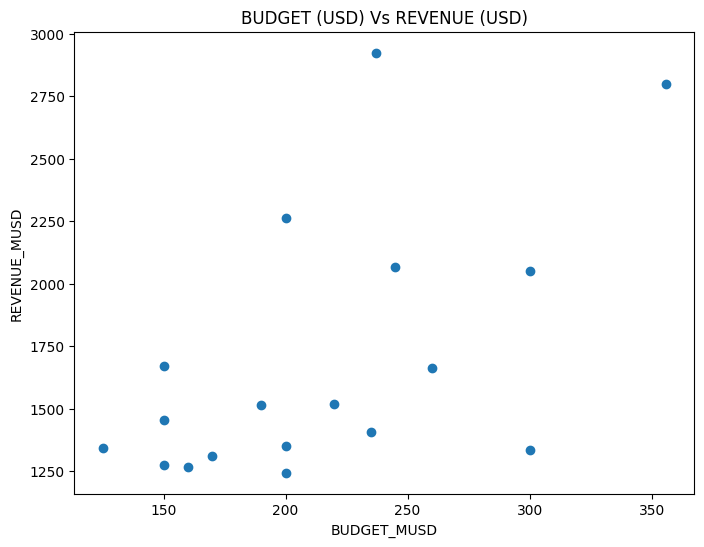

In [71]:
trendVisuals(data=movie_data, column1="budget_musd", column2="revenue_musd", title="BUDGET (USD) Vs REVENUE (USD)")

#### **POPULARITY VS RATING**

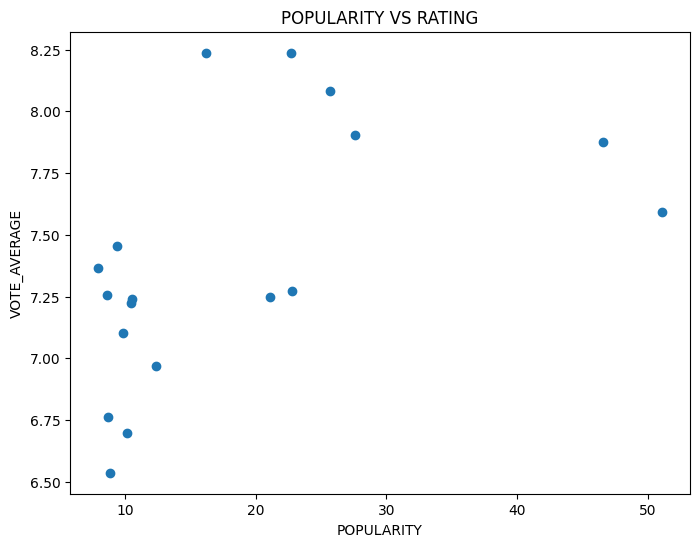

In [72]:
trendVisuals(data=movie_data, column1="popularity", column2="vote_average", title="POPULARITY VS RATING")

#### **YEARLY TRENDS**

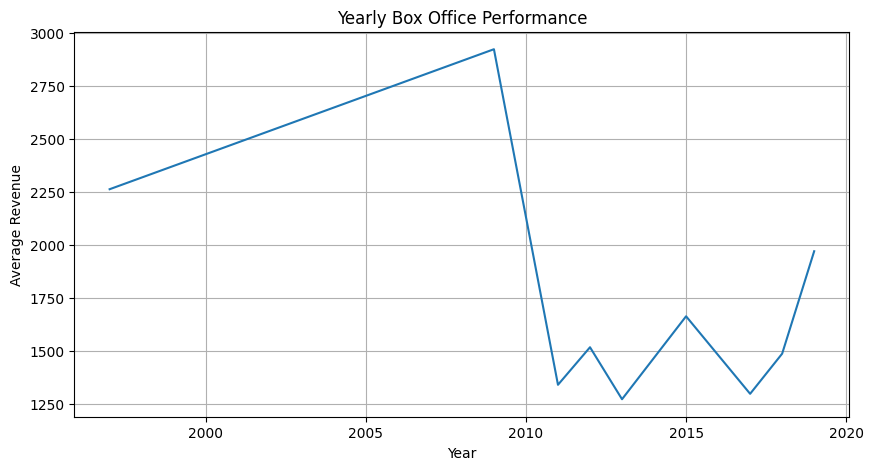

In [74]:
plot_yearly_box_office_trends(movie_data)

#### **FRANCHISE AND STANDALONE COMPARISON**

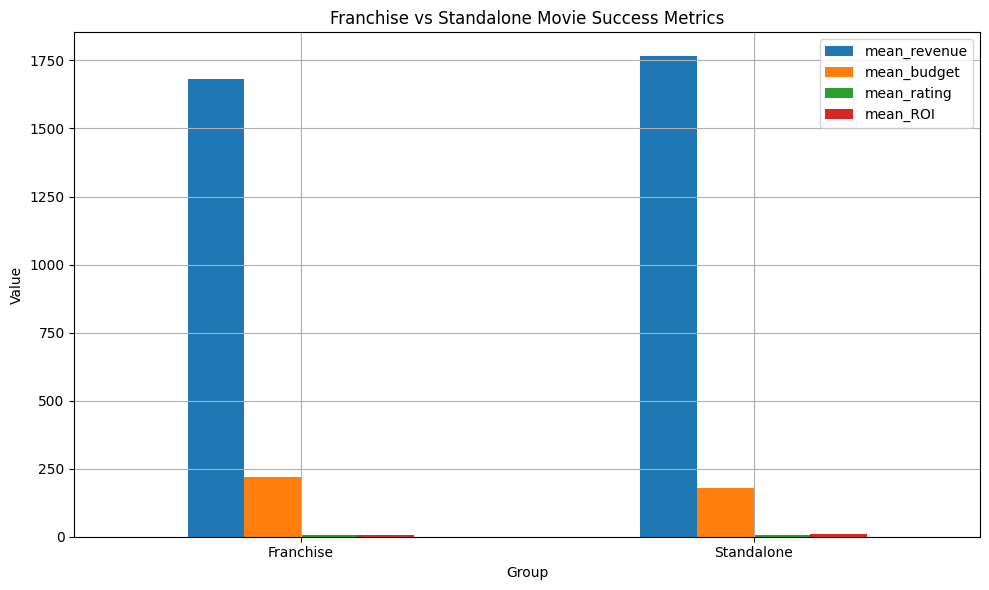

In [75]:
plot_franchise_vs_standalone(standalone_and_frachise_movies_group)